# Classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
# load data
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [4]:
# change sex column to numerical
X = pd.get_dummies(X, columns=['sex'])

In [5]:
X.isnull().sum() 

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
# fill missing values
X.age.fillna(X.age.mean(), inplace=True)
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [7]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Decision Tree Classifier

In [8]:
# model Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# print accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7374301675977654


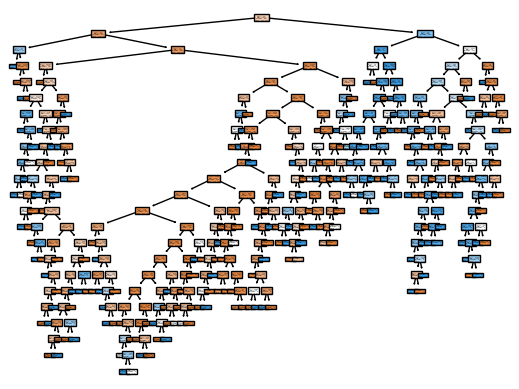

<Figure size 640x480 with 0 Axes>

In [11]:
# plot decision tree
tree.plot_tree(model.fit(X, y), filled=True)
plt.show()
plt.savefig('tree.png')

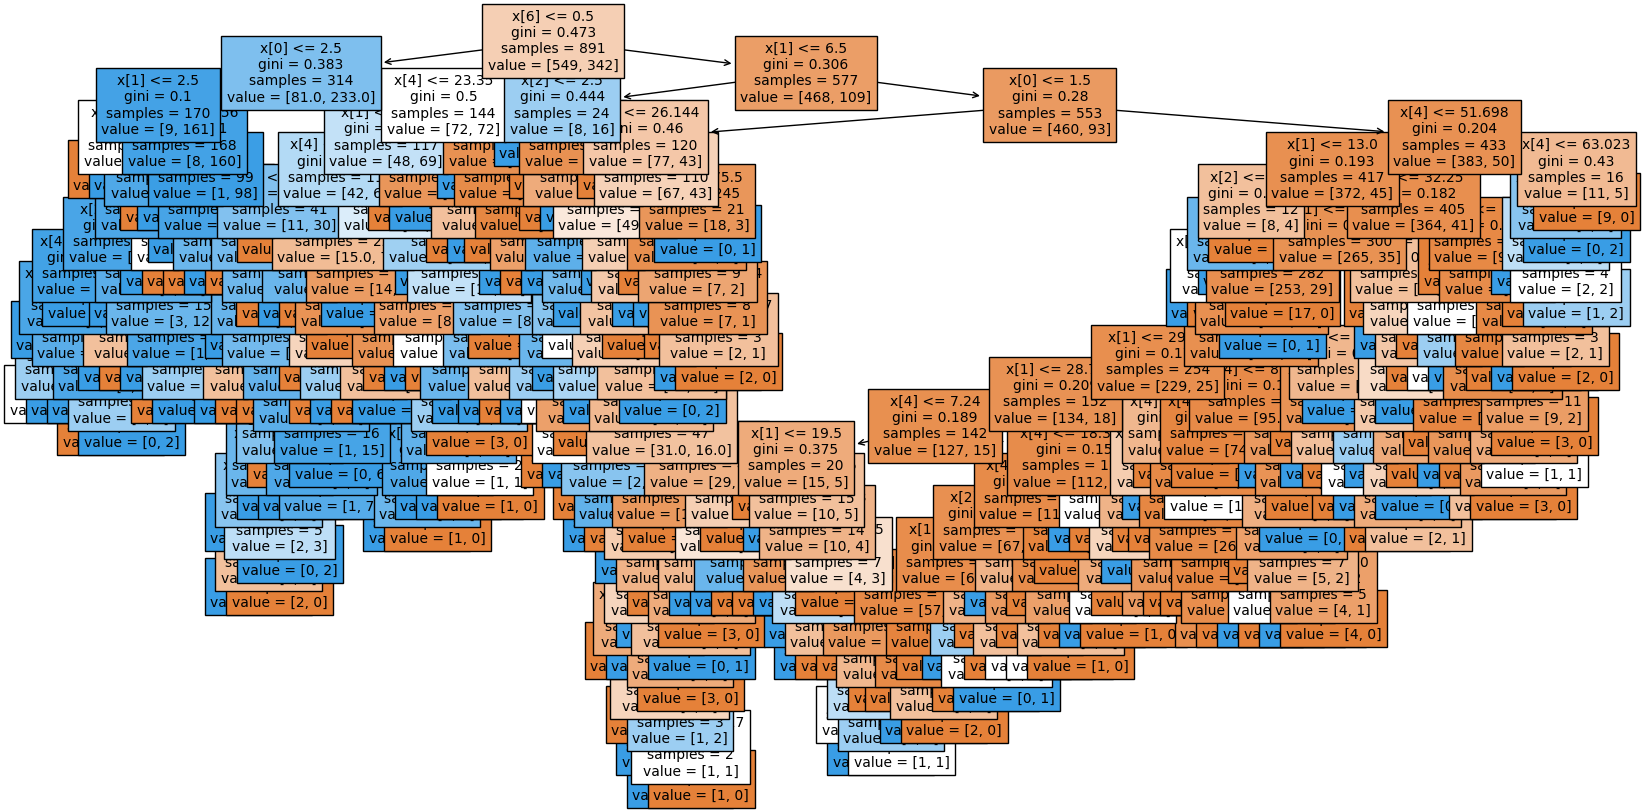

<Figure size 640x480 with 0 Axes>

In [12]:
# plot another way
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X, y), filled=True, fontsize=10)
plt.show()
plt.savefig('tree2.pdf', format='pdf', dpi=300)

> ### Precision
- Precision measures the proportion of `true positive` predictions among `all positive predictions`.

> ### Recall
- Recall measures the proportion of `true positive` predictions among `all actual positive instances`.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Precision: 0.7096774193548387
Recall: 0.6027397260273972
F1 Score: 0.6518518518518519


In [13]:
# Calculate mertics F1, precision, recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       106
           1       0.71      0.60      0.65        73

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.73      0.74      0.73       179



In [16]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 18],
       [29, 44]])

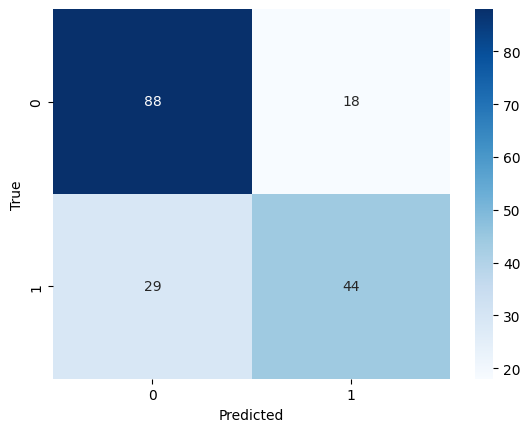

In [18]:
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# label the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 15],
       [31, 42]])

<Axes: >

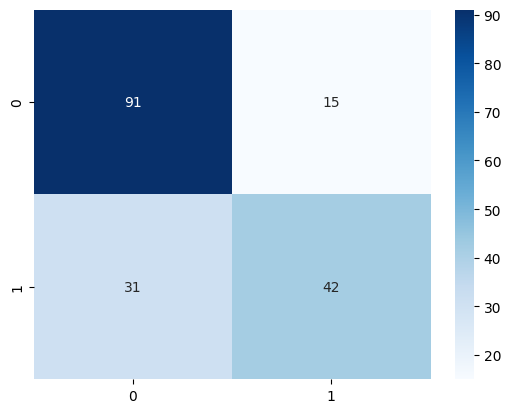

In [22]:
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

## Random Forest Classifier

In [23]:
# use random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 10],
       [28, 45]])

<Axes: >

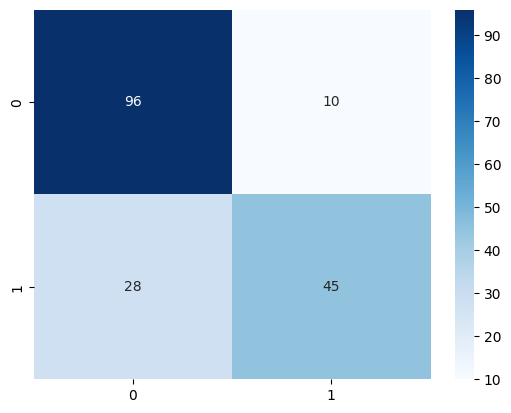

In [25]:
# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')


## Logistic Regression

In [26]:
# use logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[91, 15],
       [20, 53]])

<Axes: >

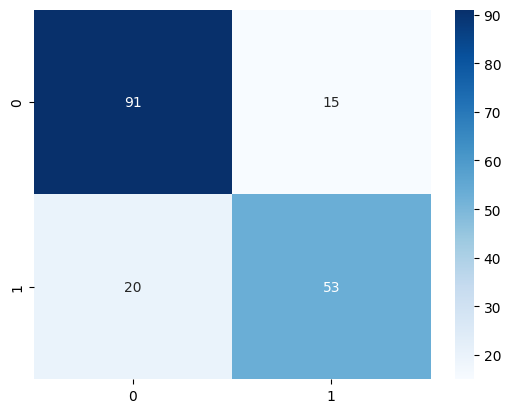

In [27]:
sns.heatmap(cm, annot=True, cmap='Blues')

## SVM (Support Vector Machine)

In [28]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 10],
       [51, 22]])

<Axes: >

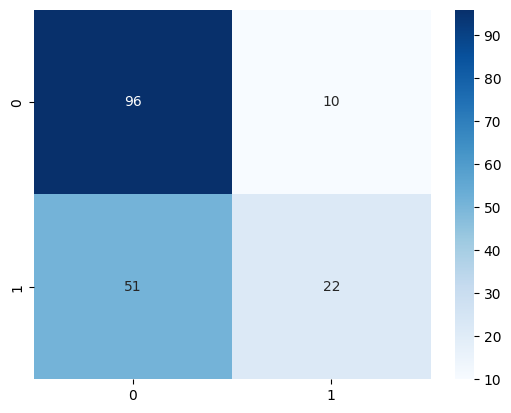

In [29]:
sns.heatmap(cm, annot=True, cmap='Blues')

## Naive Bayes

In [30]:
# use naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 14],
       [26, 47]])

## K-fold Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

# define the models to be evaluated
models = [DecisionTreeClassifier(), 
          KNeighborsClassifier(), 
          RandomForestClassifier(n_estimators=100), 
          LogisticRegression(), 
          SVC(), 
          GaussianNB()]

names = ['Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes']

# evaluate each model using k-fold cross-validation
k = 5
for model, name in zip(models, names):
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k)
    print(f'{name} CV Accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')


Decision Tree CV Accuracy: 0.775 +/- 0.017
KNN CV Accuracy: 0.715 +/- 0.039
Random Forest CV Accuracy: 0.817 +/- 0.023
Logistic Regression CV Accuracy: 0.788 +/- 0.022


/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

SVM CV Accuracy: 0.674 +/- 0.033
Naive Bayes CV Accuracy: 0.794 +/- 0.037


In [ ]:
# use grid search to find the best parameters

from sklearn.model_selection import GridSearchCV

# define the grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



Decision Tree: 0.7430167597765364
KNN: 0.7430167597765364
Random Forest: 0.7877094972067039
Logistic Regression: 0.8044692737430168
SVM: 0.659217877094972
Naive Bayes: 0.776536312849162


/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree': 0.7541899441340782, 'KNN': 0.7430167597765364, 'Random Forest': 0.7877094972067039, 'Logistic Regression': 0.8044692737430168, 'SVM': 0.659217877094972, 'Naive Bayes': 0.776536312849162}
Best Model:  Logistic Regression
Confusion Matrix: 
 [[91 15]
 [20 53]]


/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/idev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

<Axes: >

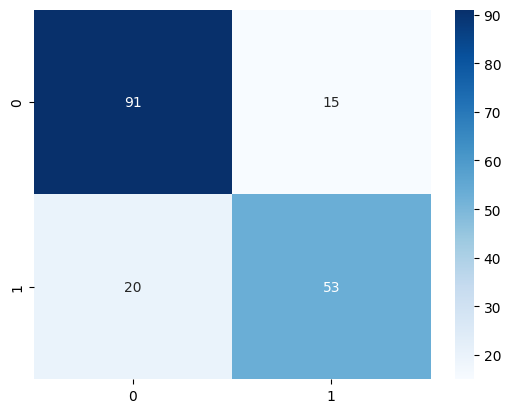

In [32]:
# how to select best model from all models

# create a list of models
models = [DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=5), 
          RandomForestClassifier(n_estimators=100, random_state=1), 
          LogisticRegression(), 
          SVC(), 
          GaussianNB()]

# create a list of model names
model_names = ['Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes']

# create a function to calculate accuracy
def calculate_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# calculate accuracy for all models
for model, name in zip(models, model_names):
    print(f'{name}: {calculate_accuracy(model, X_train, X_test, y_train, y_test)}')

# create a dictionary of models
model_dict = {'Decision Tree': DecisionTreeClassifier(), 
              'KNN': KNeighborsClassifier(n_neighbors=5), 
              'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1), 
              'Logistic Regression': LogisticRegression(), 
              'SVM': SVC(), 
              'Naive Bayes': GaussianNB()}
# create a dictionary to store accuracy
accuracy_dict = {}

# calculate accuracy for all models
for name, model in model_dict.items():
    accuracy_dict[name] = calculate_accuracy(model, X_train, X_test, y_train, y_test)

# print accuracy
print(accuracy_dict)

# select the best model
best_model = max(accuracy_dict, key=accuracy_dict.get)
print("Best Model: ", best_model)

# use the best model
model = model_dict[best_model]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
